Title of Notebook: Biggest predictor of CO2 emission

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%reload_ext google.colab.data_table

Title: CO2 emission per capita

In [ ]:

df_co2 = pd.read_csv('https://raw.githubusercontent.com/JoKa1986/CO2-Emmission---Final-Project/refs/heads/main/co-emissions-per-capita.csv')
df_co2.head()

df_co2.drop(columns=['Code'], inplace=True)
df_co2.rename(columns={'Entity':'Country', 'Annual CO₂ emissions (per capita)':'CO2 emission per capita'}, inplace=True)
df_co2 = df_co2[df_co2['Year'] >= 2019]
df_co2['CO2 emission per capita'] = df_co2['CO2 emission per capita'].round(2)
df_co2.head(100)
#df_co2.loc[:, 'Country'].unique()

,Country,Year,CO2 emission per capita
70,Afghanistan,2019,0.29
71,Afghanistan,2020,0.30
72,Afghanistan,2021,0.26
73,Afghanistan,2022,0.26
74,Afghanistan,2023,0.27
...,...,...,...
2434,Barbados,2019,5.08
2435,Barbados,2020,4.39
2436,Barbados,2021,4.17
2437,Barbados,2022,4.05


In [ ]:
# Dropping rows which aren't countries
df = df_co2.copy()
df.head()

df.drop(df[df['Country'].str.contains('-income')].index, inplace=True)
df.drop(df[df['Country'].str.contains('(excl.)')].index, inplace=True)
df = df[~df['Country'].isin(['Asia', 'Africa', 'Europe', 'European Union (27)','European Union (28)','Equatorial Guinea','North America', 'South America', 'World'])]
df.head()
# Dubble check
#df.loc[:,'Country'].unique()


<ipython-input-5-6493b3f852ce>:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.drop(df[df['Country'].str.contains('(excl.)')].index, inplace=True)


,Country,Year,CO2 emission per capita
70,Afghanistan,2019,0.29
71,Afghanistan,2020,0.30
72,Afghanistan,2021,0.26
73,Afghanistan,2022,0.26
74,Afghanistan,2023,0.27


In [ ]:
df_co = df.copy()
# Checking for missing data
#df.isnull().sum()

# Grouping: Split, Apply, Combine
grouped_co2 = df_co.groupby('Country')
grouped_co2['CO2 emission per capita'].agg(['mean', 'sum'])
grouped_co2['CO2 emission per capita'].agg(['mean', 'sum']).idxmax()

# Looking at top 5 highest CO2 emission
largest_c02 = df_co[df_co['Year'] >= 2019].nlargest(5, 'CO2 emission per capita')
largest_c02.head()

idx = df_co.groupby('Year')['CO2 emission per capita'].idxmax()
result = df_co.loc[idx]
result.head(10)

# Select outcome (Qatar)
df_co2_result = grouped_co2.get_group('Qatar')
df_co2_result.head()

,Country,Year,CO2 emission per capita
19550,Qatar,2019,36.10
19551,Qatar,2020,36.56
19552,Qatar,2021,37.03
19553,Qatar,2022,36.70
19554,Qatar,2023,38.84


Title: GDP per capita

In [ ]:
import pandas as pd
import numpy as np

df_gdp = pd.read_csv('https://raw.githubusercontent.com/JoKa1986/CO2-Emmission---Final-Project/refs/heads/main/gdp-per-capita-maddison.csv')
df_gdp.head()
df_gdp.columns

# Organizing data
df_gdp.drop(columns=['Code', '900793-annotations'], inplace=True)
df_gdp.rename(columns={'Entity':'Country'}, inplace=True)
df_gdp = df_gdp[df_gdp['Year'] >= 2019]
df_gdp['GDP per capita'] = df_gdp['GDP per capita'].round(2)
df_gdp.head(100)

df_gdp.loc[:, 'Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia (MPD)', 'Eastern Europe (MPD)',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Finland', 'Former Sudan', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras',
       'Hong Kong', 'Hu

In [ ]:
# Dropping rows which are not countries
df1 = df_gdp.copy()
df1.head()

df1.drop(df1[df1['Country'].str.contains('(MPD)')].index, inplace=True)
df1 = df1[~df1['Country'].isin(['Equatorial Guinea', 'USSR', 'World'])]

# Dubble check
df1.loc[:, 'Country'].unique()

<ipython-input-12-90d1aa47ad86>:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df1.drop(df1[df1['Country'].str.contains('(MPD)')].index, inplace=True)


array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Finland', 'Former Sudan', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Irelan

In [ ]:
df_gdp = df1.copy()
df_gdp.head()

# Checking for missing data
#df1.isnull().sum()

# Grouping: Split, Apply, Combine
grouped_gdp = df_gdp.groupby('Country')
grouped_gdp['GDP per capita'].agg(['mean', 'sum'])
grouped_gdp['GDP per capita'].agg(['mean', 'sum']).idxmax()

# Looking at the top 5 highest GDP
largest_gdp = df_gdp[df_gdp['Year'] >= 2017].nlargest(5, 'GDP per capita')
largest_gdp.head()

idx = df_gdp.groupby('Year')['GDP per capita'].idxmax()
result = df_gdp.loc[idx]
result.head(10)

# Select outcome
df_gdp_result = grouped_gdp.get_group('Qatar')

# Adding year 2023 for Qatar
new_row_qatar_2023 = {"Country": "Qatar", "Year": "2023", "GDP per capita":"146622.65"}
df_gdp_result = pd.concat([df_gdp_result, pd.DataFrame([new_row_qatar_2023])], ignore_index=True)
df_gdp_result.head()

# Calculating the mean of Qatar 2019-2022 to fill in 2023
#mean_gdp_qatar = df_gdp_result['GDP per capita'].mean()
#print(mean_gdp_qatar)

,Country,Year,GDP per capita
0,Qatar,2019,150732.22
1,Qatar,2020,143118.53
2,Qatar,2021,143468.75
3,Qatar,2022,149171.11
4,Qatar,2023,146622.65


Title: Population growth

In [ ]:
import pandas as pd
import numpy as np

df_pop = pd.read_csv('https://raw.githubusercontent.com/JoKa1986/CO2-Emmission---Final-Project/refs/heads/main/population.csv')
df_pop.head()

# Organizing data
df_pop.rename(columns={'Entity':'Country', 'Population - Sex: all - Age: all - Variant: estimates': 'Population'}, inplace=True)
df_pop = df_pop[df_pop['Year'] >= 2019]
df_pop.head(100)

#df_pop.loc[:, 'Country'].unique()

,Country,Year,Population
69,Afghanistan,2019,37856126
70,Afghanistan,2020,39068978
71,Afghanistan,2021,40000411
72,Afghanistan,2022,40578846
73,Afghanistan,2023,41454762
...,...,...,...
1475,Bangladesh,2019,164913060
1476,Bangladesh,2020,166298024
1477,Bangladesh,2021,167658855
1478,Bangladesh,2022,169384890


In [ ]:
# Dropping rows which are not countries
df1 = df_pop.copy()
df1.head()
df1.drop(df1[df1['Country'].str.contains('(UN)')].index, inplace=True)
df1.drop(df1[df1['Country'].str.contains('-income')].index, inplace=True)
df1.drop(df1[df1['Country'].str.contains('countries')].index, inplace=True)
df1.drop(df1[df1['Country'].str.contains('regions')].index, inplace=True)
df1 = df1[~df1['Country'].isin(['American Samoa', 'Equatorial Guinea', 'Small island developing states (SIDS)', 'Vatican', 'Western Sahara', 'World'])]
df1.head(1000)

# Dubble Check
#df1.loc[:, 'Country'].unique()

<ipython-input-17-90f0c9f7f2c6>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df1.drop(df1[df1['Country'].str.contains('(UN)')].index, inplace=True)


,Country,Year,Population
69,Afghanistan,2019,37856126
70,Afghanistan,2020,39068978
71,Afghanistan,2021,40000411
72,Afghanistan,2022,40578846
73,Afghanistan,2023,41454762
...,...,...,...
16201,Sri Lanka,2019,22410552
16202,Sri Lanka,2020,22561807
16203,Sri Lanka,2021,22700377
16204,Sri Lanka,2022,22834964


In [ ]:
df_clean = df1.copy()

# Checking for missing data
#df_clean.isnull().sum()

# Grouping: Split, Apply, Combine
grouped_pop = df_clean.groupby('Country')
grouped_pop['Population'].agg(['mean', 'sum'])
grouped_pop['Population'].agg(['mean', 'sum']).idxmax()

# Looking at top 5 biggest population
largest_pop = df_clean[df_clean['Year'] >= 2019].nlargest(5, 'Population')
largest_pop.head()

idx = df_pop.groupby('Year')['Population'].idxmax()
result = df_pop.loc[idx]
result.head(10)

# Select outcome (China, because 3x in top 5: India 2x)
df_pop_result = grouped_pop.get_group('China')
df_pop_result.head()

# Selecting population of Qatar for chart
df_pop_result = grouped_pop.get_group('Qatar')
df_pop_result.head()

,Country,Year,Population
13907,Qatar,2019,2797927
13908,Qatar,2020,2803373
13909,Qatar,2021,2814989
13910,Qatar,2022,2892465
13911,Qatar,2023,2979087


Title: Fossil fuels per capita

In [ ]:
import pandas as pd
import numpy as np

df_fos = pd.read_csv('https://raw.githubusercontent.com/JoKa1986/CO2-Emmission---Final-Project/refs/heads/main/fossil-fuels-per-capita.csv')
df_fos.head(100)

# Organizing data
df_fos.rename(columns={'Entity':'Country'}, inplace=True)
df_fos.drop(columns=['Code'], inplace=True)
df_fos = df_fos[df_fos['Year'] >= 2019]
df_fos['Fossil fuels per capita (kWh)'] = df_fos['Fossil fuels per capita (kWh)'].round(2)
df_fos.head(100)
df_fos.loc[:, 'Country'].unique()

array(['Africa', 'Algeria', 'Argentina', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia',
       'Czechia', 'Denmark', 'Ecuador', 'Egypt', 'Estonia', 'Europe',
       'European Union (27)', 'Finland', 'France', 'Germany', 'Greece',
       'High-income countries', 'Hong Kong', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Kuwait', 'Latvia', 'Lithuania',
       'Lower-middle-income countries', 'Luxembourg', 'Malaysia',
       'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'North America',
       'North Macedonia', 'Norway', 'Oceania', 'Oman', 'Pakistan', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia',
       'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia',
       'South Africa', 'South America', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'Taiwan'

In [ ]:
# Dropping rows which aren't countries
df2 = df_fos.copy()
df2.drop(df2[df2['Country'].str.contains('countries')].index, inplace=True)
df2 = df2[~df2['Country'].isin(['Asia','Africa','Europe','European Union (27)', 'North America','South America', 'World'])]
df2.head(100)

,Country,Year,Fossil fuels per capita (kWh)
113,Algeria,2019,16211.09
114,Algeria,2020,14888.94
115,Algeria,2021,15977.15
116,Algeria,2022,16310.98
117,Algeria,2023,15416.60
...,...,...,...
1161,Estonia,2019,42239.94
1162,Estonia,2020,37205.28
1163,Estonia,2021,39445.35
1164,Estonia,2022,41223.45


In [ ]:
df_gr = df2.copy()
df_gr.head()

# Checking for missing data
#df_gr.isnull().sum()

# Grouping: Split, Apply, Combine
grouped_fos = df_gr.groupby('Country')
grouped_fos['Fossil fuels per capita (kWh)'].agg(['mean', 'sum'])
grouped_fos['Fossil fuels per capita (kWh)'].agg(['mean', 'sum']).idxmax()

# Looking at top 5 largest Fossil Fuels per capita
largest_fos = df_gr[df_gr['Year'] >= 2019].nlargest(5, 'Fossil fuels per capita (kWh)')
largest_fos.head()

idx = df_fos.groupby('Year')['Fossil fuels per capita (kWh)'].idxmax()
result = df_fos.loc[idx]
result.head(10)

# Selecting outcome (Qatar)
df_fos_result = grouped_fos.get_group('Qatar')
df_fos_result.head()

,Country,Year,Fossil fuels per capita (kWh)
3038,Qatar,2019,207712.90
3039,Qatar,2020,185149.81
3040,Qatar,2021,201395.50
3041,Qatar,2022,209834.67
3042,Qatar,2023,225427.10


In [ ]:
import pandas as pd
import numpy as np

df_trans = pd.read_csv('https://raw.githubusercontent.com/JoKa1986/CO2-Emmission---Final-Project/refs/heads/main/co2-emissions-transport.csv')
df_trans.head()

# Organizing data
df_trans.rename(columns={'Entity':'Country', 'Carbon dioxide emissions from transport': 'CO2 emission from transport'}, inplace=True)
df_trans.drop(columns=['Code'], inplace=True)
df_trans = df_trans[df_trans['Year'] >= 2017]
df_trans.head(100)

#df_trans.loc[:,'Country'].unique()

,Country,Year,CO2 emission from transport
27,Afghanistan,2017,3940000.0
28,Afghanistan,2018,4410000.0
29,Afghanistan,2019,4550000.0
30,Afghanistan,2020,5070000.0
31,Afghanistan,2021,5420000.0
...,...,...,...
635,Benin,2017,5990000.0
636,Benin,2018,6750000.0
637,Benin,2019,5910000.0
638,Benin,2020,6170000.0


In [ ]:
# Dropping rows which aren't countries
df_tr = df_trans.copy()
df_tr.head()

df_tr.drop(df_tr[df_tr['Country'].str.contains('countries')].index, inplace=True)
df_tr = df_tr[~df_tr['Country'].isin(['Asia','Africa','Equatorial Guinea', 'Europe','European Union (27)', 'North America','South America', 'World'])]
df_tr.head()

# Dubble check
df_tr.loc[:,'Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', '

In [ ]:
df_tr_gr=df_tr.copy()
df_tr_gr.head()

# Checking for missing data
#df_tr_gr.isnull().sum()

# Grouping: Split, Apply, Combine
grouped_trans = df_tr_gr.groupby('Country')
grouped_trans['CO2 emission from transport'].agg(['mean', 'max']).idxmax()
grouped_trans['CO2 emission from transport'].agg(['mean', 'max']).idxmin()

# looking at op 5
largest_trans = df_tr_gr[df_tr_gr['Year'] >= 2019].nlargest(5, 'CO2 emission from transport')
largest_trans.head()

idx = df_trans.groupby('Year')['CO2 emission from transport'].idxmax()
result = df_trans.loc[idx]
result.head(10)

# Selecting Outcome
df_trans_result = grouped_trans.get_group('Qatar')
df_trans_result.head()

# Filling in 2022 and 2023 for chart
new_row_qatar_2022 = {"Country": "Qatar", "Year": "2022", "CO2 emission from transport":"11990000"}
df_trans_result = pd.concat([df_trans_result, pd.DataFrame([new_row_qatar_2022])], ignore_index=True)
new_row_qatar_2023 = {"Country": "Qatar", "Year": "2023", "CO2 emission from transport":"11870000"}
df_trans_final = pd.concat([df_trans_result, pd.DataFrame([new_row_qatar_2023])], ignore_index=True)

df_trans_final.head()

,Country,Year,CO2 emission from transport
0,Qatar,2017,13450000.00
1,Qatar,2018,11760000.00
2,Qatar,2019,12330000.00
3,Qatar,2020,11450000.00
4,Qatar,2021,12180000.00
5,Qatar,2022,11990000
6,Qatar,2023,11870000


Title: Dietary Available for consumption per day (kcl) per country

In [ ]:
import pandas as pd
import numpy as np

df_dt = pd.read_csv('https://raw.githubusercontent.com/JoKa1986/CO2-Emmission---Final-Project/refs/heads/main/dietary-composition-by-country.csv')
df_dt.head(100)
df_dt.columns

# Organizing data
columns = df_dt.columns
df_dt.columns = [x.rstrip('Food available for consumption | 0664pc || kilocalories per day per capita') if x.endswith('Food available for consumption | 0664pc || kilocalories per day per capita') else x for x in df_dt.columns]
df_dt.columns = [col.split(" | ")[0] for col in columns]
df_dt.head(0)

df_dt.drop(columns=['Code'], inplace=True)
df_dt.rename(columns={'Entity':'Country'}, inplace=True)
df_dt.rename(columns={'Miscellaneous group':'Misc. group', 'Alcoholic Beverages': 'Alcohol.', 'Vegetable Oils': 'Veg. Oils', 'Fish and seafood': 'Seafood'}, inplace=True)
df_dt.rename(columns={'Meat, sheep and goat':'Sheep/Goat', 'Meat, pig':'Pork', 'Meat, poultry': 'Poultry', 'Meat, beef': 'Beef'}, inplace=True)
df_dt = df_dt[df_dt['Year'] >= 2019]

pd.options.display.float_format = '{:.2f}'.format
df_dt.head()
#df_dt.loc[:, 'Country'].unique()

In [ ]:
# Dropping rows which aren't countries
df3 = df_dt.copy()
df3.head()

df3.drop(df3[df3['Country'].str.contains('countries')].index, inplace=True)
df3.drop(df3[df3['Country'].str.contains('(FAO)')].index, inplace=True)
df3 = df3[~df3['Country'].isin(['Africa','Asia', 'Europe','European Union (27)', 'North America','South America', 'World'])]
df3.head(10)

# Dubble Check
df3.loc[:, 'Country'].unique()

<ipython-input-30-e8d1ca17e7e2>:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df3.drop(df3[df3['Country'].str.contains('(FAO)')].index, inplace=True)


,Country,Year,Misc. group,Alcohol.,Animal fats group,Veg. Oils,Oilcrops,Seafood,Sugar crops,Sugar & Sweeteners,...,Milk,Nuts,Fruit,Vegetables,Pulses,"Cereals, Other",Barley,Maize,Rice,Wheat
58,Afghanistan,2019,2.00,0.00,29.00,188.00,17.00,1.00,NaN,156.00,...,90.00,12.87,64.00,42.00,17.00,0.02,0.53,29.25,133.21,1346.93
59,Afghanistan,2020,2.00,0.00,29.00,180.00,18.00,1.00,NaN,154.00,...,88.00,11.29,63.00,55.00,24.00,0.41,0.77,21.95,160.46,1351.48
60,Afghanistan,2021,2.00,0.00,28.00,194.00,12.00,1.00,NaN,132.00,...,85.00,11.95,54.00,50.00,16.00,5.62,5.89,40.48,143.99,1309.37
241,Albania,2019,19.00,50.00,63.00,246.00,38.00,16.00,NaN,213.00,...,667.00,39.63,300.00,230.00,47.00,1.74,1.33,18.92,67.10,944.18
242,Albania,2020,17.00,51.00,58.00,246.00,42.00,16.00,NaN,228.00,...,632.00,43.23,307.00,239.00,52.00,2.66,1.60,15.62,48.12,961.20
243,Albania,2021,20.00,50.00,65.00,232.00,32.00,16.00,NaN,246.00,...,629.00,49.67,334.00,246.00,47.00,0.87,1.51,18.43,58.27,899.11
302,Algeria,2019,10.00,6.00,13.00,520.00,22.00,8.00,0.00,297.00,...,262.00,16.81,234.00,178.00,61.00,0.07,102.32,124.66,27.59,1335.27
303,Algeria,2020,8.00,5.00,25.00,540.00,24.00,8.00,0.00,300.00,...,264.00,15.69,229.00,167.00,54.00,0.20,87.84,140.16,26.68,1360.04
304,Algeria,2021,9.00,5.00,31.00,549.00,21.00,8.00,0.00,295.00,...,254.00,15.02,233.00,160.00,61.00,0.13,74.60,118.81,25.21,1396.20
424,Angola,2019,6.00,79.00,10.00,283.00,43.00,28.00,NaN,140.00,...,12.00,0.42,113.00,16.00,69.00,0.30,0.00,392.26,149.70,181.11


In [ ]:
df_diet = df3.copy()
df_diet.head()

# Checking for missing data
#df_diet.isnull().sum()

# Grouping: Split, Apply, Combine
grouped_diet = df_diet.groupby('Country')
grouped_diet.agg(['mean', 'max']).idxmax()
grouped_diet[['Seafood', 'Meat, Other', 'Pork', 'Sheep/Goat', 'Poultry', 'Beef']].mean().idxmax()
grouped_diet[['Nuts', 'Fruit', 'Vegetables']].mean().idxmax()

largest_diet = df_diet[df_diet['Year'] >= 2019].nlargest(5, 'Seafood')
largest_diet.head()

idx = df_diet.groupby('Year')['Country'].idxmax()
result = df_diet.loc[idx]
result.head(10)

# Selectiong Outcome
grouped_diet.get_group('China') # Because vegetables
grouped_diet.get_group('United States') # Because of Veg. oils and Sugar % Sweeteners
grouped_diet.get_group('Qatar') # For chart

,Country,Year,Misc. group,Alcohol.,Animal fats group,Veg. Oils,Oilcrops,Seafood,Sugar crops,Sugar & Sweeteners,...,Milk,Nuts,Fruit,Vegetables,Pulses,"Cereals, Other",Barley,Maize,Rice,Wheat
9274,Qatar,2019,46.00,16.00,66.00,395.00,41.00,38.00,0.00,262.00,...,184.00,43.65,172.00,126.00,91.00,2.54,3.80,13.61,689.11,704.25
9275,Qatar,2020,47.00,15.00,47.00,407.00,39.00,39.00,NaN,271.00,...,175.00,38.85,173.00,128.00,93.00,6.09,0.09,24.58,696.20,691.64
9276,Qatar,2021,44.00,17.00,73.00,415.00,38.00,40.00,0.00,270.00,...,167.00,44.87,181.00,122.00,94.00,2.93,3.01,18.51,645.48,719.88


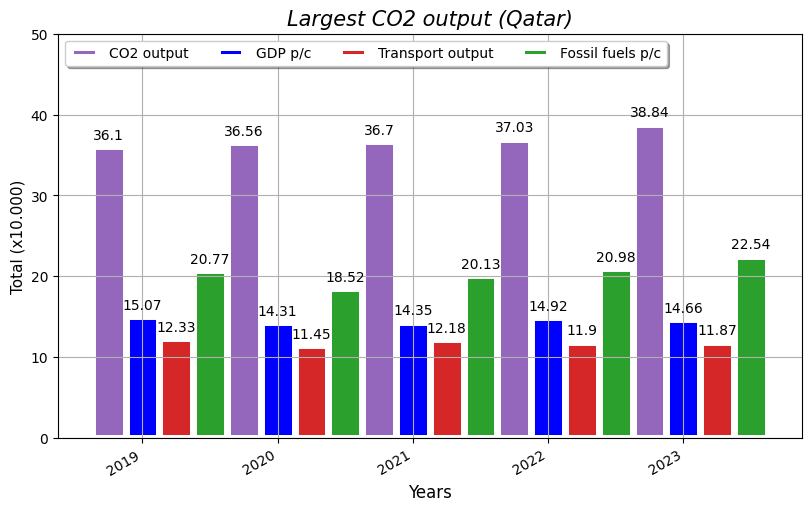

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

years = ("2019", "2020", "2021", "2022", "2023")
qatar = {
    'CO2 output': [36.10, 36.56, 36.70, 37.03, 38.84],
    'GDP p/c':[15.07, 14.31, 14.35, 14.92, 14.66],
    'Transport output':[12.33, 11.45, 12.18, 11.90, 11.87],
    'Fossil fuels p/c':[20.77, 18.52, 20.13, 20.98, 22.54]
  }
x = np.arange(len(years))
width = 0.25
multiplier = 0
colors = ['tab:purple', 'blue', 'tab:red', 'tab:green']
fig, ax = plt.subplots(layout='constrained', figsize=(8, 5))

for attribute, measurement in qatar.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, edgecolor="w", linewidth=5, label=attribute, color=colors[multiplier])
    ax.bar_label(rects, padding=3)
    multiplier += 1

for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

ax.set_ylabel('Total (x10.000)', fontsize=11)
ax.set_ylim(0, 50)
ax.set_xlabel('Years', fontsize=12)
ax.set_title('Largest CO2 output (Qatar)', fontsize=15, fontstyle='italic')
ax.set_xticks(x + width, years)
ax.legend(loc='upper left', fontsize=10, ncols=4, shadow=True, fancybox=True)
ax.grid()

plt.show()